### Path Finder: What are the potential paths between two nodes?
### This pipeline can be used to get a ranked path between A and B given a set of paths.

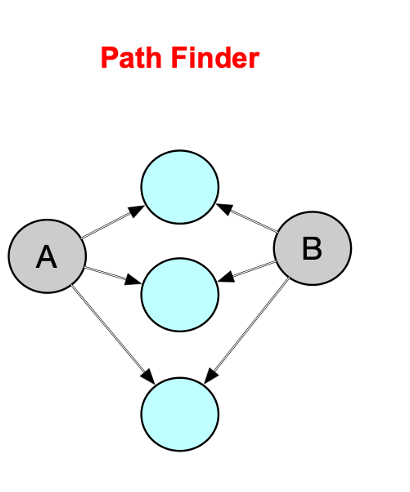

Example questions: 

What drugs may treat ovarian cancer (MONDO:0008170) patients with BRCA1 mutation?  

What is the mechanism of Olaparib being effective for patients with BRCA1 mutation?


In [1]:
#!pip install openai


In [2]:
# include path ../src in order to import modules
import sys
sys.path.append('../TCT')
import TCT as TCT
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets

In [3]:
# Step1: List all the APIs in the translator system
Translator_KP_info,APInames= TCT.get_SmartAPI_Translator_KP_info()
#Translator_KP_info.to_csv('SmartAPI_Translator_KP_info.csv', index=False)
print(len(Translator_KP_info))

Skipping server without x-maturity: {'description': 'Production server', 'url': 'https://smart-api.info/api'}
Skipping server without x-maturity: {'description': 'Development server', 'url': 'https://dev.smart-api.info/api'}
SmartAPI API
Skipping server without production, staging or testing: {'description': 'Development server', 'url': 'https://dev.smart-api.info/api'}
Skipping server without x-maturity: {'description': 'Staging server', 'url': 'http://biothings.test.transltr.io/annotator'}
Skipping server without x-maturity: {'description': 'CI server', 'url': 'http://biothings.ci.transltr.io/annotator'}
99


In [4]:
# Step 2: Get metaKG and all predicates from Translator APIs
metaKG = TCT.get_KP_metadata(APInames) # This only applies to the Translator APIs
#print(metaKG.columns)
#print(metaKG.shape)

#metaKG.to_csv('../metaData/metaKG.csv', index=False)
#metaKG = pd.read_csv('../metaData/metaKG.csv')
All_predicates = list(set(metaKG['KG_category']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))

In [5]:
#### The following use case is to fine the Genes or proteins that connect the gene BRCA2 and the drug Olaparib


In [6]:
# Step 3: set input parameters

# Node1 for query
input_node1 = 'BRCA2'
input_node1_id = TCT.get_curie(input_node1)
print(input_node1_id)
input_node1_list = [input_node1_id]
input_node1_category = ['biolink:Gene'] # Node: this has to be in a format of biolink:xxx

#Node2 for query
input_node2_list = []
#input_node2_category = ['biolink:Drug','biolink:SmallMolecule'] # Node: this has to be in a format of biolink:xxx
input_node2_category = ['biolink:Gene','biolink:Protein'] # Node: this has to be in a format of biolink:xxx


# Get all predicates for the input node1 and node2, user can furter select the predicates among this list
sele_predicates = list(set(TCT.select_concept(sub_list=input_node1_category,
                                              obj_list=input_node2_category,
                                              metaKG=metaKG)))

print("all relevant predicates in Translator:")
print(sele_predicates)
# select predicates

# Get all APIs for the input node1 and node2, user can furter select the APIs among this list
sele_APIs_1 = TCT.select_API(sub_list=input_node1_category,
                             obj_list=input_node2_category,
                             metaKG=metaKG)
print("all relevant APIs in Translator:")
print(sele_APIs_1)

# get API URLs
API_URLs_1 = TCT.get_Translator_API_URL(sele_APIs_1, APInames)

#---------------------------------------------------------------------------------------------------------------------------------#

# Node3 for query
#input_node3 = 'Ovarian cancer'
input_node3 = "Olaparib"
input_node3_id = TCT.get_curie(input_node3)
print(input_node3_id)
#input_node3_id = "MONDO:0008170" # have to change UMLS to MONDO ids
input_node3_list = [input_node3_id]
input_node3_category = ['biolink:SmallMolecule', 'biolink:Drug','biolink:ChemicalSubstance'] # Node: this has to be in a format of biolink:xxx
#input_node3_category = ['biolink:Disease']

# Get all predicates for the input node1 and node2, user can furter select the predicates among this list
sele_predicates_2 = list(set(TCT.select_concept(sub_list=input_node3_category,
                                                obj_list=input_node2_category,
                                                metaKG=metaKG)))
print("all relevant predicates in Translator:")
print(sele_predicates_2)
# select predicates

# Get all APIs for the input node1 and node2, user can furter select the APIs among this list
sele_APIs_2 = TCT.select_API(sub_list=input_node3_category,
                             obj_list=input_node2_category,
                             metaKG=metaKG)
print("all relevant APIs in Translator:")
print(sele_APIs_2)

# get API URLs
API_URLs_2 = TCT.get_Translator_API_URL(sele_APIs_2, 
                                      APInames)

NCBIGene:675
all relevant predicates in Translator:
['biolink:increases_response_to', 'biolink:associated_with', 'biolink:causes', 'biolink:has_gene_product', 'biolink:part_of', 'biolink:close_match', 'biolink:has_part', 'biolink:has_participant', 'biolink:affected_by', 'biolink:related_to', 'biolink:orthologous_to', 'biolink:derives_into', 'biolink:genetically_associated_with', 'biolink:acts_upstream_of_or_within', 'biolink:affects', 'biolink:genetically_interacts_with', 'biolink:associated_with_resistance_to', 'biolink:produces', 'biolink:interacts_with', 'biolink:decreases_response_to', 'biolink:subclass_of', 'biolink:chemically_similar_to', 'biolink:negatively_correlated_with', 'biolink:derives_from', 'biolink:directly_physically_interacts_with', 'biolink:homologous_to', 'biolink:physically_interacts_with', 'biolink:produced_by', 'biolink:has_input', 'biolink:gene_product_of', 'biolink:regulated_by', 'biolink:regulates', 'biolink:correlated_with', 'biolink:associated_with_sensitivi

In [7]:
# Step 4: Format query json
query_json = TCT.format_query_json(input_node1_list,  # a list of identifiers for input node1
                                   input_node2_list,  # it can be empty list if only want to query node1
                                   input_node1_category,  # a list of categories of input node1
                                   input_node2_category,  # a list of categories of input node2
                                   sele_predicates) # a list of predicates
# Step 5: Query Translator APIs and parse results
result = TCT.parallel_api_query(API_URLs_1,query_json=query_json, max_workers=len(API_URLs_1))
# Step 6: Parse results
result_parsed = TCT.parse_KG(result)
# Step 7: Ranking the results. This ranking method is based on the number of unique primary infores. It can only be used to rank the results with one defined node.
result_ranked_by_primary_infores = TCT.rank_by_primary_infores(result_parsed, input_node1_id)   # input_node1_id is the curie id of the input node, such as "NCBIGene:672"


Warning Code:400:https://mygene.info/v3/query/
Warning Code:404:https://api.pharmgkb.org/v1/query/
Warning Code:404:https://api-v3.monarchinitiative.org/query/
Warning Code:404:https://ia.transltr.io/api/v1.5/query/
Warning Code:404:https://molepro-trapi.transltr.io/molepro/trapi/v1.5/query/
Warning Code:404:https://spokekp.transltr.io/api/v1.5/query/
Success!https://automat.transltr.io/pharos/query/
Success!https://automat.transltr.io/icees-kg/query/
Success!https://automat.renci.org/ehr-may-treat-kp/query/
Success!https://automat.transltr.io/monarch-kg/query/
Success!https://automat.transltr.io/genome-alliance/query/
Success!https://automat.transltr.io/cam-kp/query/
Warning Code:400:https://biothings.ncats.io/text_mining_targeted_association/query/
Warning Code:400:https://biothings.ncats.io/innatedb/query/
Warning Code:400:https://biothings.ncats.io/biggim_drugresponse_kp/query/
Warning Code:400:https://biothings.ncats.io/semmeddb/query/
Warning Code:400:https://biothings.ncats.io/a

UniProtKB:Q03468-1: no preferred name
UniProtKB:Q96GD0-1: no preferred name
ENSEMBL:ENSP00000499503: no preferred name
UniProtKB:Q03468-1: no preferred name
UniProtKB:P98175-5: no preferred name
ENSEMBL:ENSP00000499503: no preferred name
UniProtKB:P98175-5: no preferred name
UniProtKB:Q96GD0-1: no preferred name
[Text(0.5, 0, 'PALB2'), Text(2.5, 0, 'TP53'), Text(4.5, 0, 'FANCD2'), Text(6.5, 0, 'PCNA'), Text(8.5, 0, 'BARD1'), Text(10.5, 0, 'PLK1'), Text(12.5, 0, 'PARP1'), Text(14.5, 0, 'ATM'), Text(16.5, 0, 'XRCC3'), Text(18.5, 0, 'BCCIP'), Text(20.5, 0, 'SYCP3'), Text(22.5, 0, 'KAT2B'), Text(24.5, 0, 'NCL'), Text(26.5, 0, 'UBP11_HUMAN Ubiquitin carboxyl-terminal hydrolase 11 (sprot)'), Text(28.5, 0, 'BRCA1'), Text(30.5, 0, 'AURKB'), Text(32.5, 0, 'MCPH1'), Text(34.5, 0, 'HSP90AB1'), Text(36.5, 0, 'H2AX'), Text(38.5, 0, 'FANCE'), Text(40.5, 0, 'RECQL5'), Text(42.5, 0, 'APEX1'), Text(44.5, 0, 'RAD23A'), Text(46.5, 0, 'RAD21'), Text(48.5, 0, 'SERPINH1')]


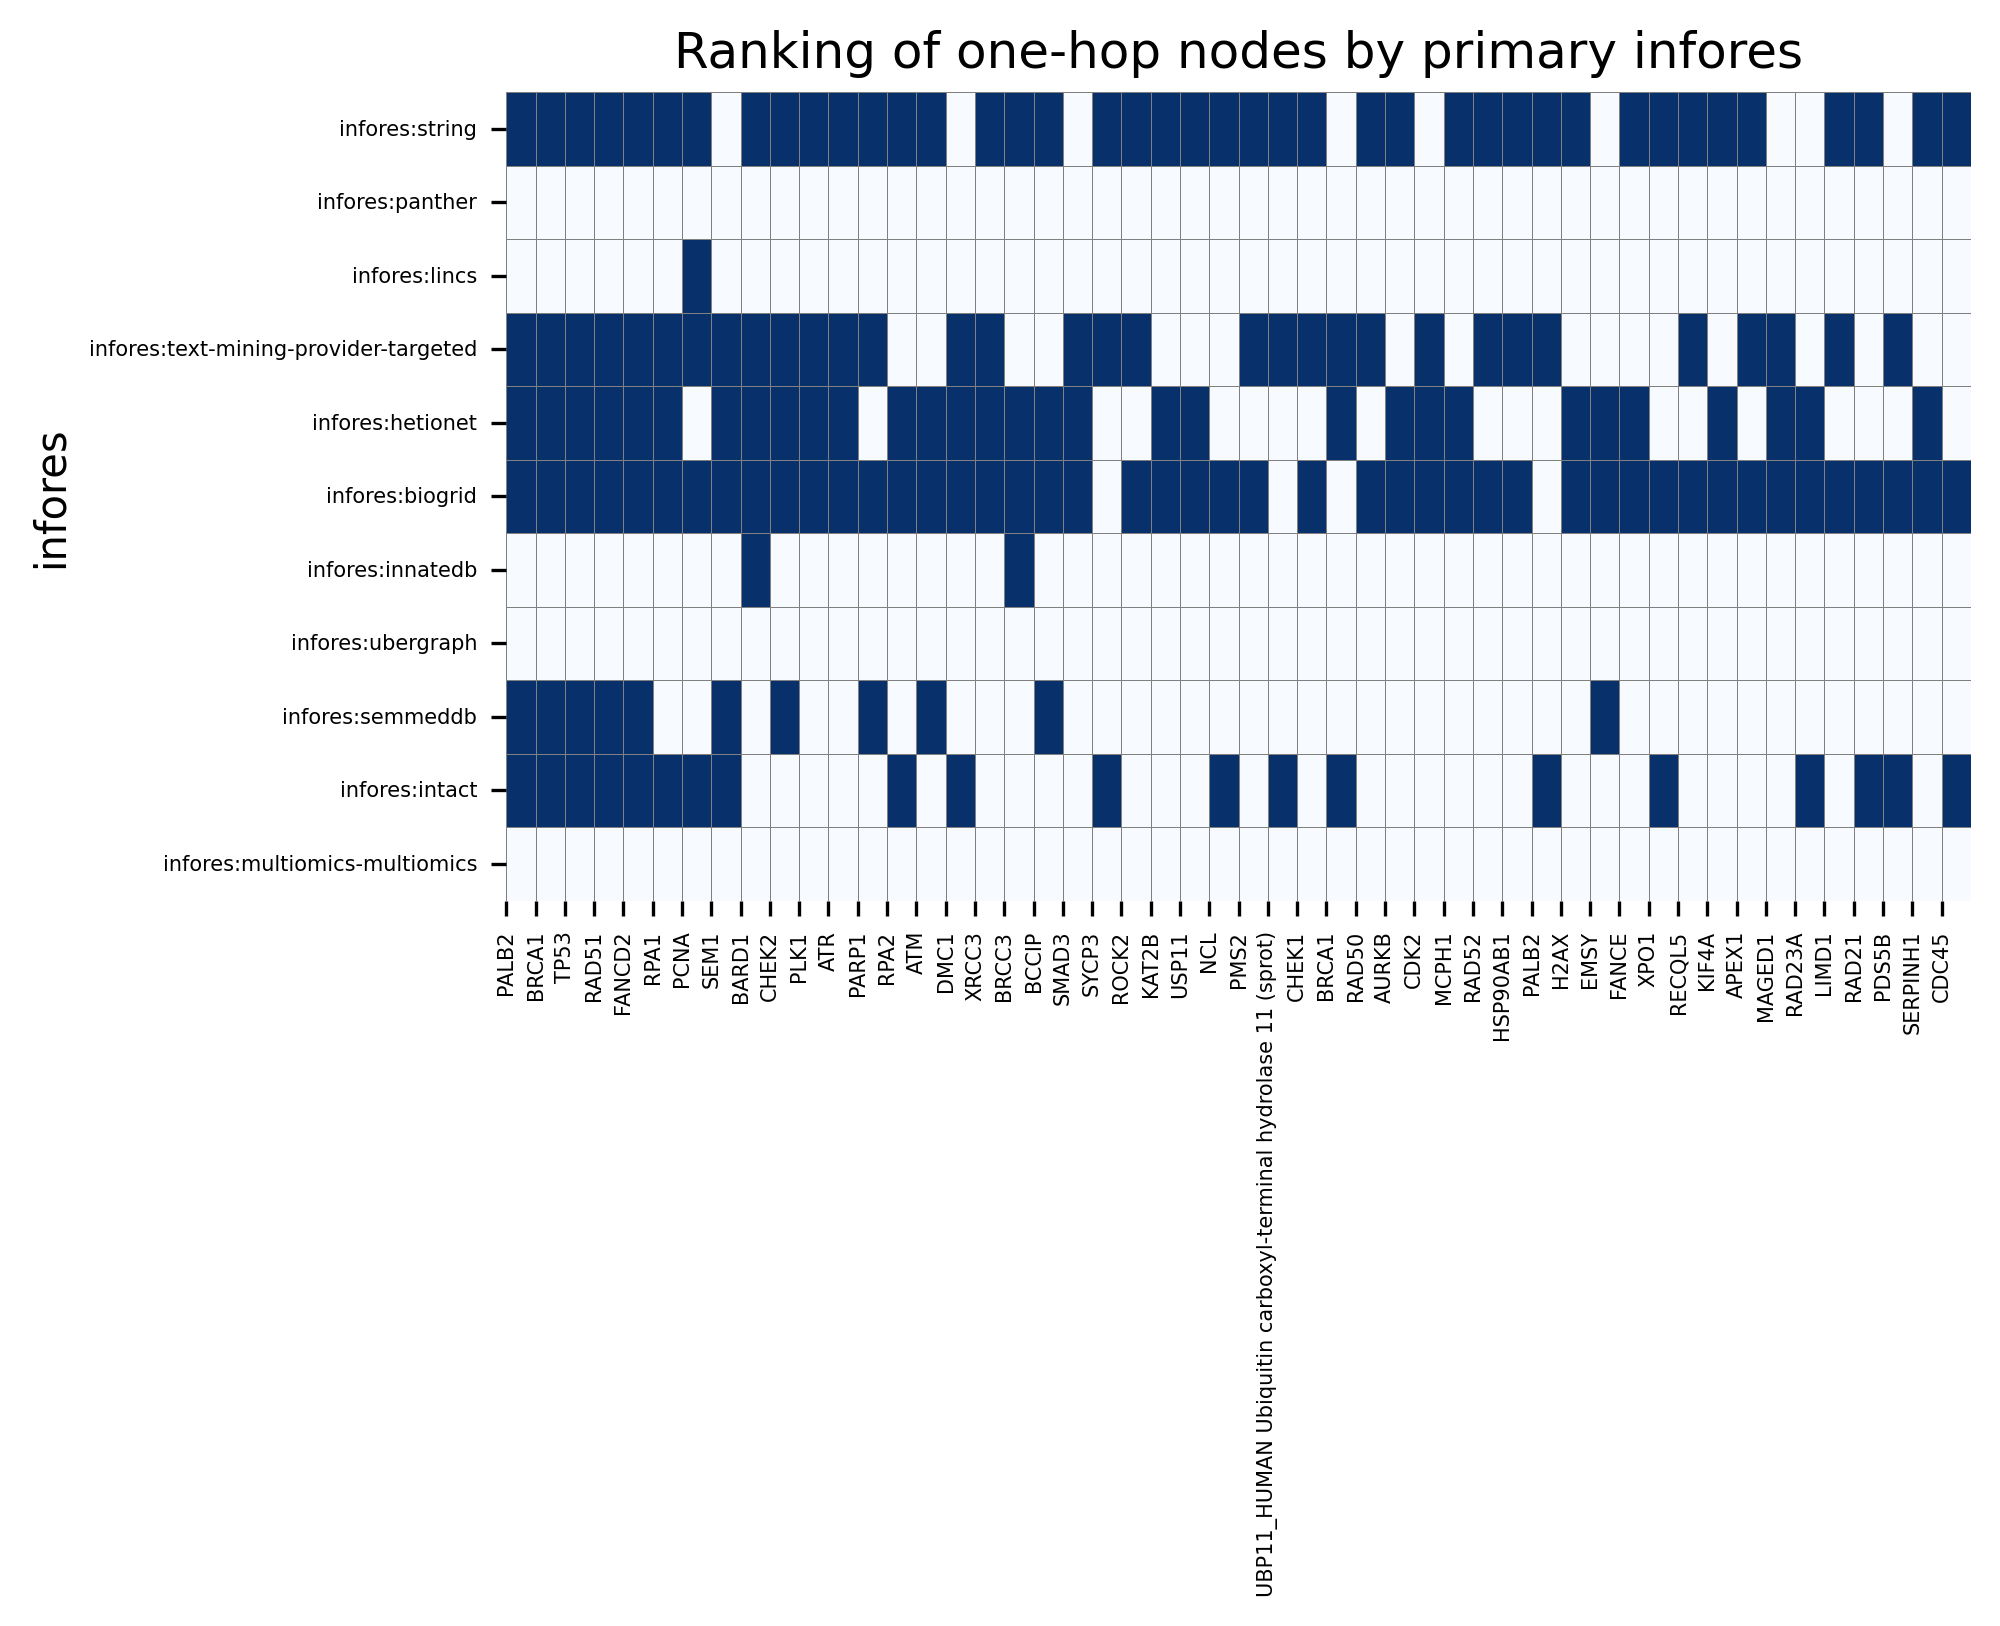

[Text(0.5, 0, 'PALB2'), Text(2.5, 0, 'TP53'), Text(4.5, 0, 'FANCD2'), Text(6.5, 0, 'PCNA'), Text(8.5, 0, 'BARD1'), Text(10.5, 0, 'PLK1'), Text(12.5, 0, 'PARP1'), Text(14.5, 0, 'ATM'), Text(16.5, 0, 'XRCC3'), Text(18.5, 0, 'BCCIP'), Text(20.5, 0, 'SYCP3'), Text(22.5, 0, 'KAT2B'), Text(24.5, 0, 'NCL'), Text(26.5, 0, 'UBP11_HUMAN Ubiquitin carboxyl-terminal hydrolase 11 (sprot)'), Text(28.5, 0, 'BRCA1'), Text(30.5, 0, 'AURKB'), Text(32.5, 0, 'MCPH1'), Text(34.5, 0, 'HSP90AB1'), Text(36.5, 0, 'H2AX'), Text(38.5, 0, 'FANCE'), Text(40.5, 0, 'RECQL5'), Text(42.5, 0, 'APEX1'), Text(44.5, 0, 'RAD23A'), Text(46.5, 0, 'RAD21'), Text(48.5, 0, 'SERPINH1')]


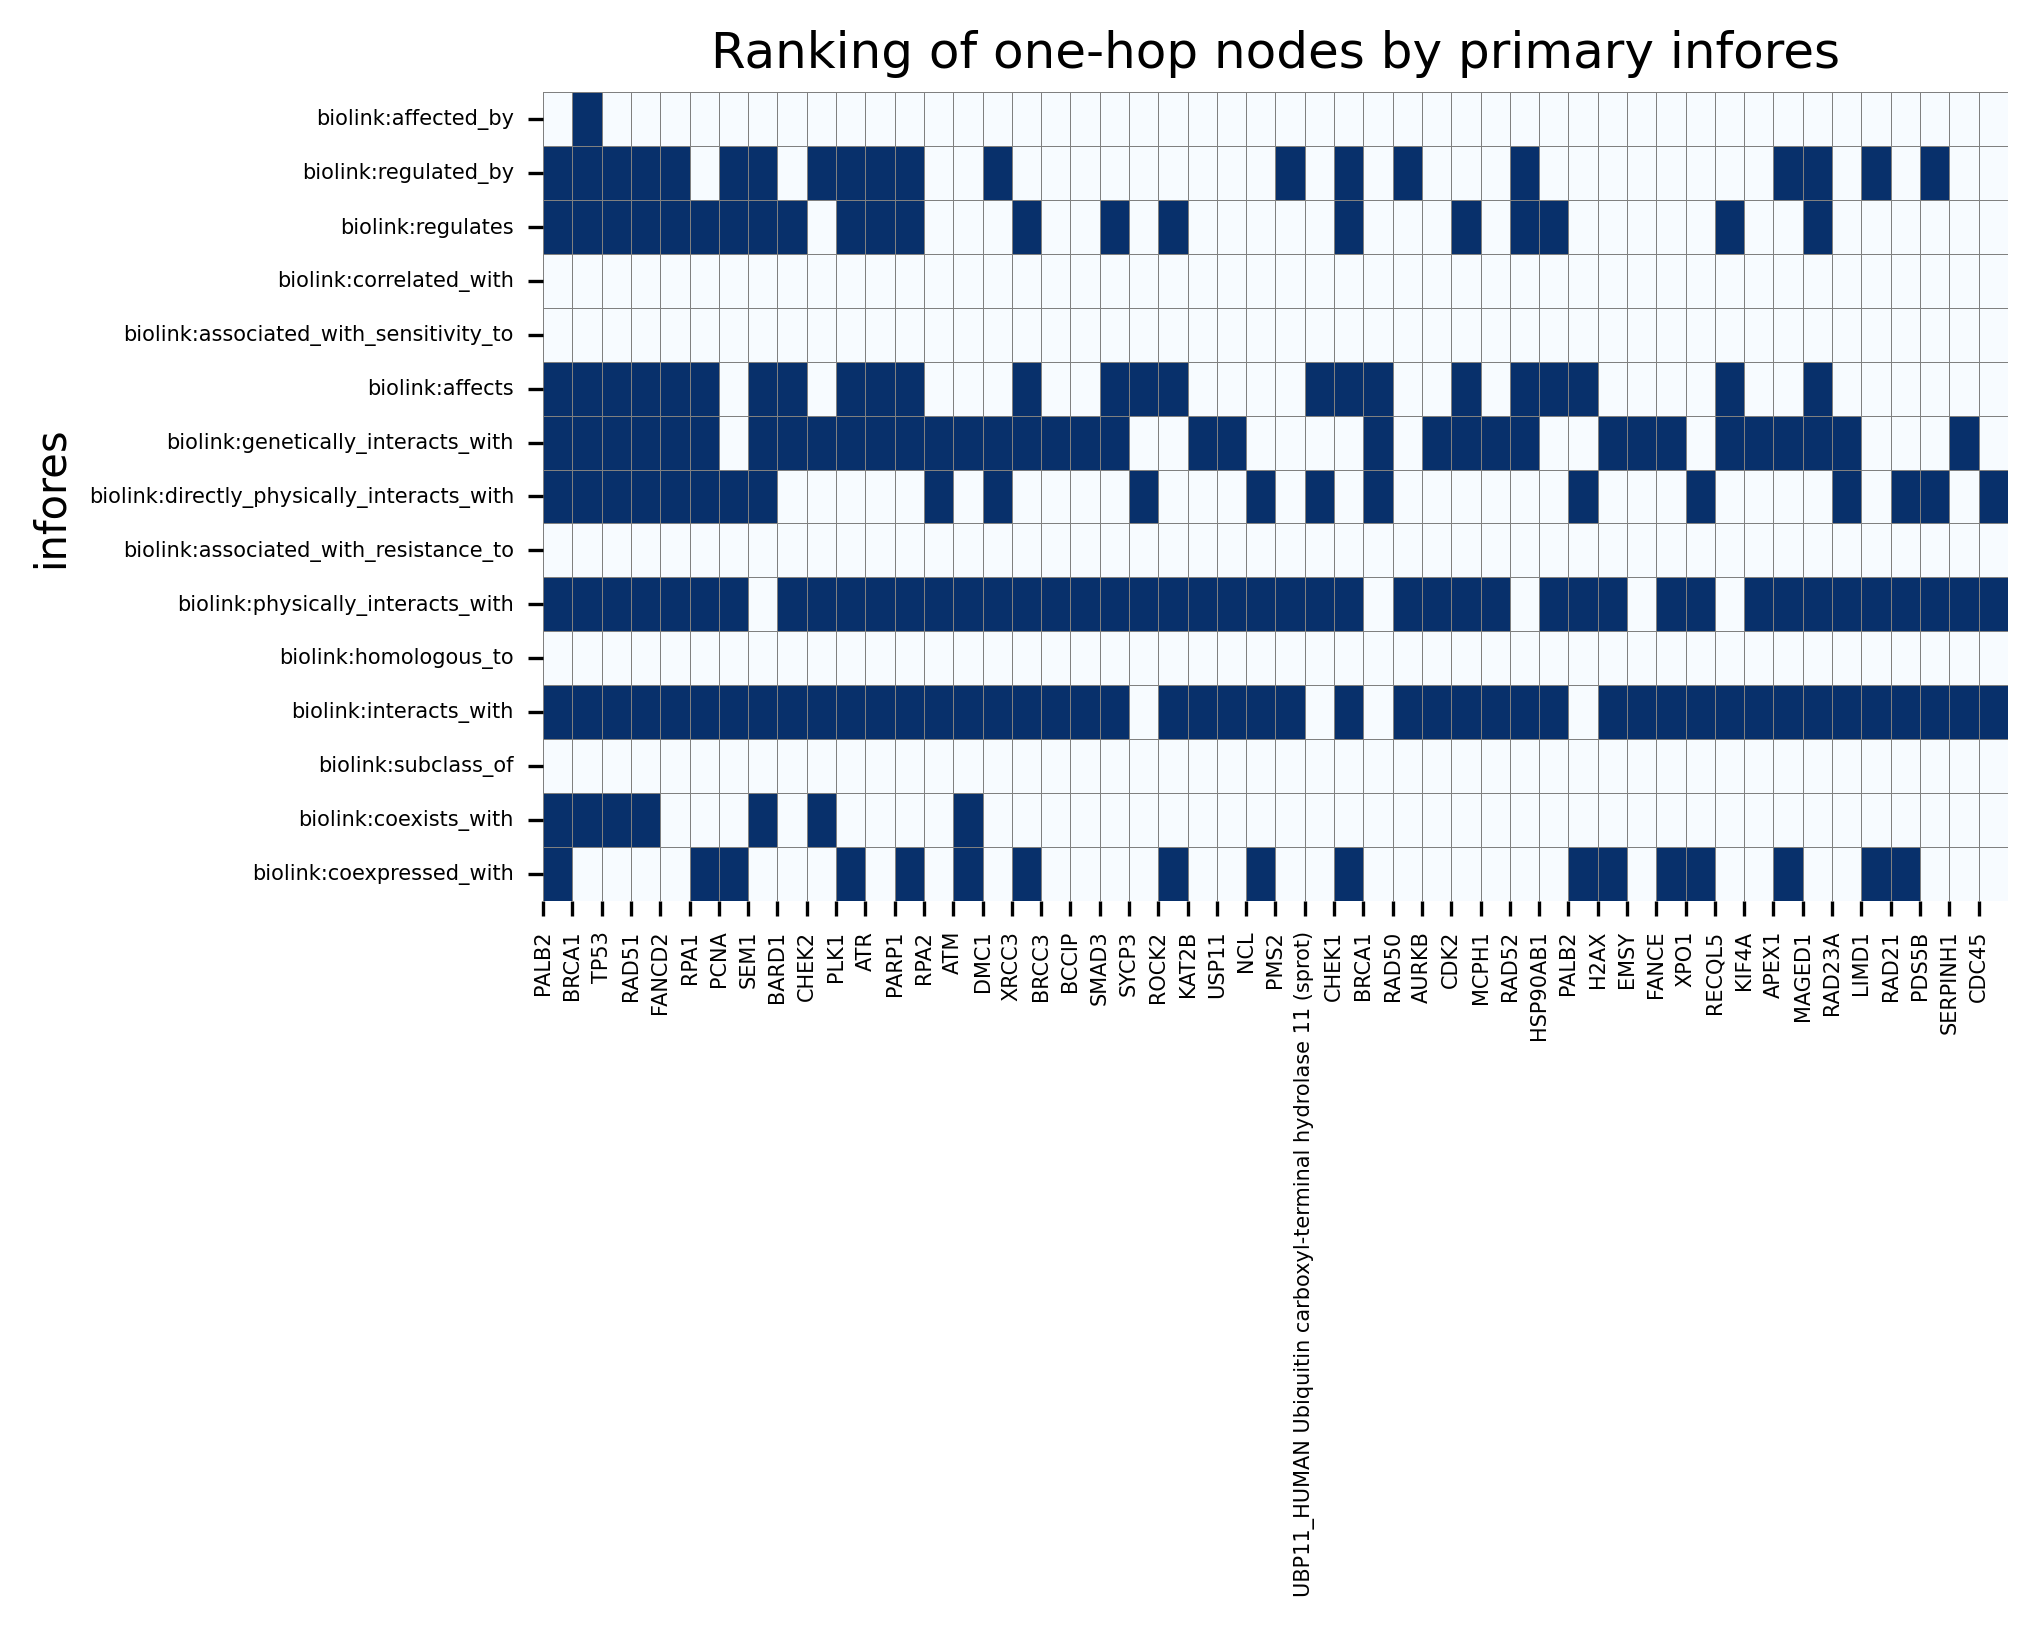

,PALB2,BRCA1,TP53,RAD51,FANCD2,RPA1,PCNA,SEM1,BARD1,CHEK2,...,RPA-related protein RADX isoform h1 (human),DNA damage-binding protein 2 isoform h1 (human),thymidylate synthase isoform h1 (human),ubiquitin carboxyl-terminal hydrolase 2 isoform h1 (human),DEP domain-containing protein 1A isoform h1 (human),heat shock factor 2-binding protein isoform h1 (human),USP26,coiled-coil domain-containing protein 18 isoform h1 (human),TACC3,MYBL2
biolink:affected_by,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:regulated_by,1,1,1,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
biolink:regulates,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
biolink:correlated_with,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:associated_with_sensitivity_to,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:affects,1,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
biolink:genetically_interacts_with,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
biolink:directly_physically_interacts_with,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:associated_with_resistance_to,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
biolink:physically_interacts_with,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [8]:
# Step 8: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores, 
                                 result_parsed, 
                                 num_of_nodes = 50, 
                                 input_query = input_node1_id,
                                 fontsize = 5,
                                 title_fontsize=12)

In [9]:
# Step 9: Format query json
query_json2 = TCT.format_query_json(input_node3_list,  # a list of identifiers for input node1
                                   input_node2_list,  # it can be empty list if only want to query node1
                                   input_node3_category,  # a list of categories of input node1
                                   input_node2_category,  # a list of categories of input node2
                                   sele_predicates_2) # a list of predicates


In [10]:
# Step 10: Query Translator APIs and parse results
result2 = TCT.parallel_api_query(API_URLs_2,query_json=query_json2, max_workers=len(API_URLs_2))

# Step 11: Parse results
result_parsed2 = TCT.parse_KG(result2)

# Step 12: Ranking the results. This ranking method is based on the number of unique primary infores. It can only be used to rank the results with one defined node.
result_ranked_by_primary_infores2 = TCT.rank_by_primary_infores(result_parsed2, input_node3_id)   # input_node1_id is the curie id of the input node, such as "NCBIGene:672"


Warning Code:404:https://api.pharmgkb.org/v1/query/
Warning Code:400:https://mychem.info/v1/query/
Warning Code:404:https://molepro-trapi.transltr.io/molepro/trapi/v1.5/query/
Warning Code:404:https://ctdbase.org/query/
Success!https://automat.transltr.io/icees-kg/query/
Warning Code:400:https://biothings.ncats.io/ttd/query/
Success!https://automat.transltr.io/ubergraph/query/
Success!https://automat.transltr.io/hmdb/query/
Warning Code:400:https://biothings.ncats.io/pfocr/query/
Warning Code:400:https://biothings.ncats.io/annotator/query/
Warning Code:400:https://biothings.ncats.io/dgidb/query/
Success!https://automat.renci.org/ehr-may-treat-kp/query/
Success!https://automat.renci.org/ehr-clinical-connections-kp/query/
Success!https://cooccurrence.ci.transltr.io/query/
Warning Code:400:https://biothings.ncats.io/semmeddb/query/
Warning Code:400:https://biothings.ncats.io/biggim_drugresponse_kp/query/
Warning Code:400:https://biothings.ncats.io/multiomics_wellness_kp/query/
Warning Cod

NodeNorm does not know about these identifiers: NCBIGene:8205,TTD.TARGET:T17228,TTD.TARGET:T83059,TTD.TARGET:T34867,NCBIGene:NaN
[Text(0.5, 0, 'PARP1'), Text(2.5, 0, 'PARP3'), Text(4.5, 0, 'PARP4'), Text(6.5, 0, 'PARP10'), Text(8.5, 0, 'PARP15'), Text(10.5, 0, 'BRCA2'), Text(12.5, 0, 'PARP12'), Text(14.5, 0, 'ACTA2'), Text(16.5, 0, 'H2AX'), Text(18.5, 0, 'CDKN1A'), Text(20.5, 0, 'BCL2'), Text(22.5, 0, 'IL6'), Text(24.5, 0, 'AKT1'), Text(26.5, 0, 'PTEN'), Text(28.5, 0, 'ATR')]


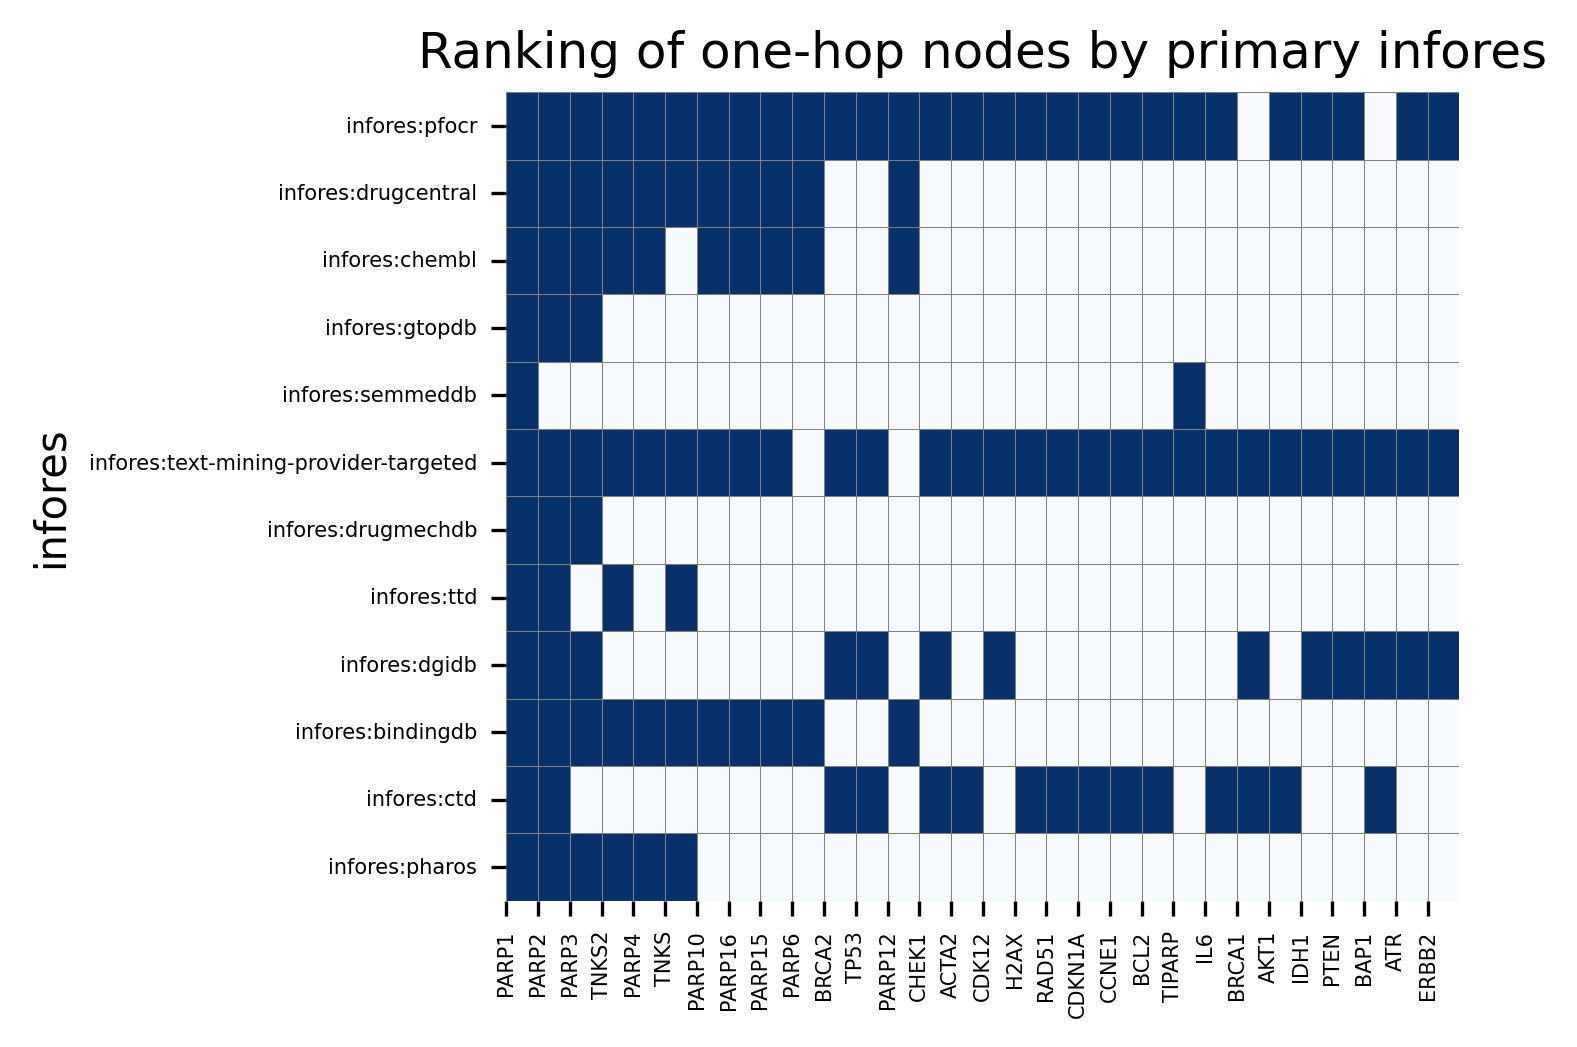

[Text(0.5, 0, 'PARP1'), Text(2.5, 0, 'PARP3'), Text(4.5, 0, 'PARP4'), Text(6.5, 0, 'PARP10'), Text(8.5, 0, 'PARP15'), Text(10.5, 0, 'BRCA2'), Text(12.5, 0, 'PARP12'), Text(14.5, 0, 'ACTA2'), Text(16.5, 0, 'H2AX'), Text(18.5, 0, 'CDKN1A'), Text(20.5, 0, 'BCL2'), Text(22.5, 0, 'IL6'), Text(24.5, 0, 'AKT1'), Text(26.5, 0, 'PTEN'), Text(28.5, 0, 'ATR')]


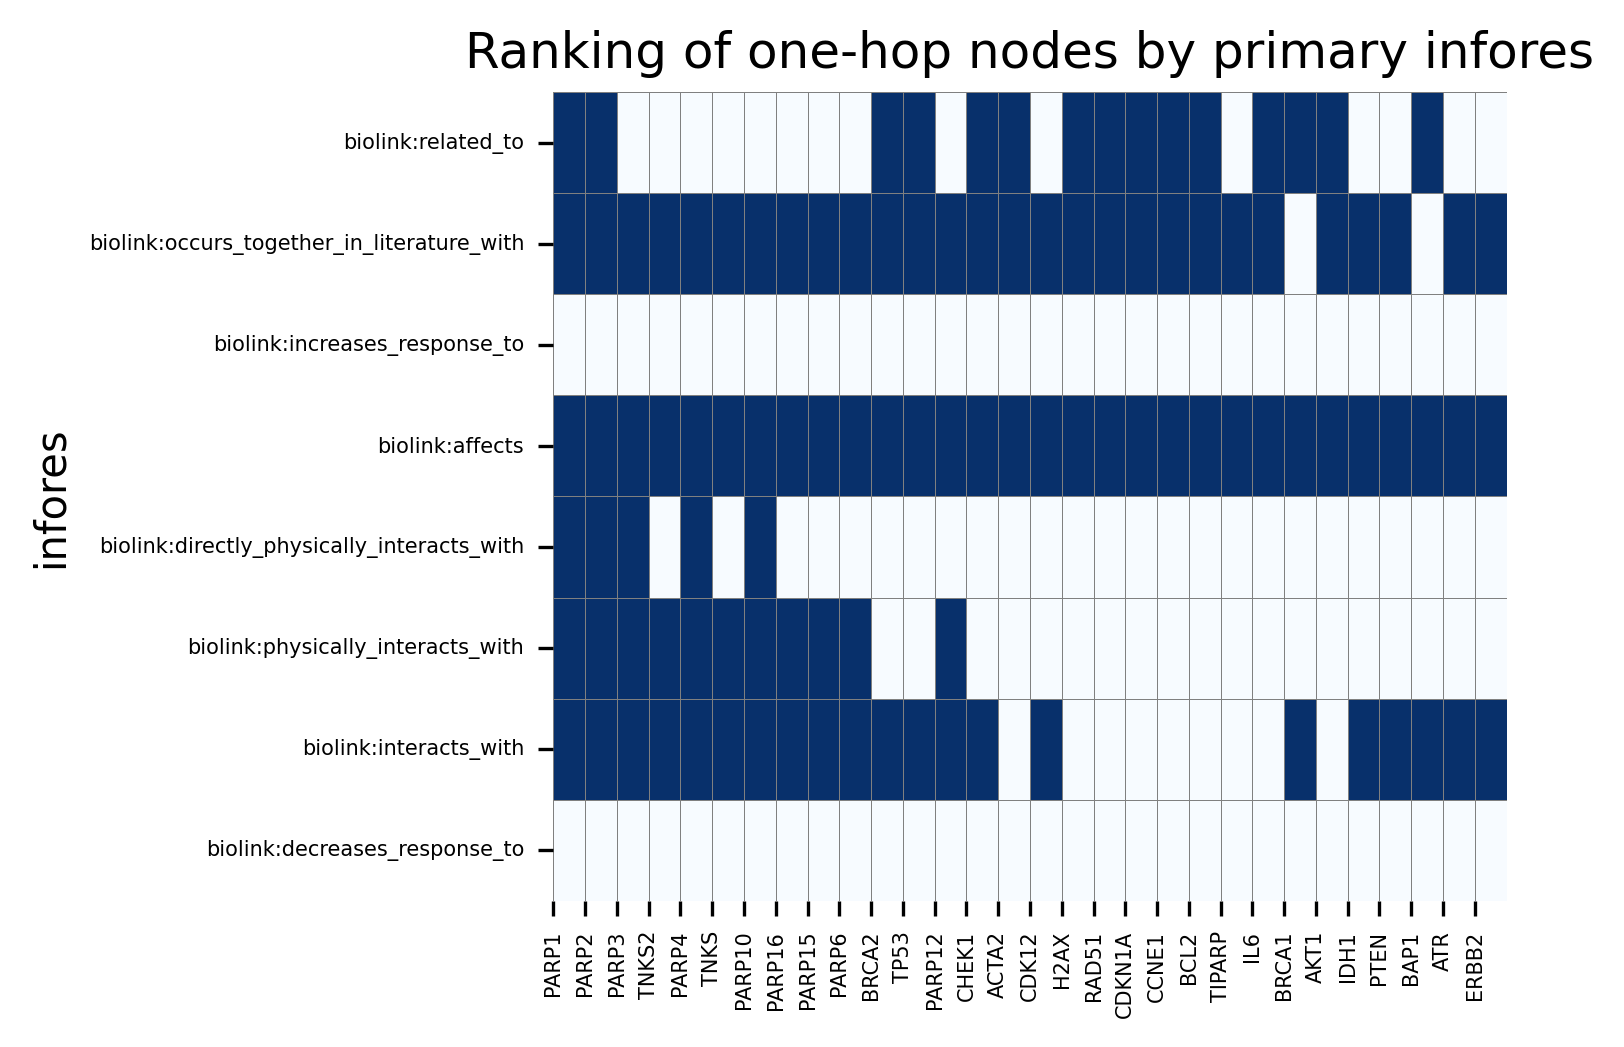

,PARP1,PARP2,PARP3,TNKS2,PARP4,TNKS,PARP10,PARP16,PARP15,PARP6,...,SLCO1B1,PPP2R2A,SLC35E1,SERPINB7,HSPA5,SLC22A7,ANP32E,TOPBP1,ODC1,Poly(ADP-ribose) Polymerases
biolink:related_to,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:occurs_together_in_literature_with,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
biolink:increases_response_to,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:affects,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
biolink:directly_physically_interacts_with,1,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:physically_interacts_with,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
biolink:interacts_with,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
biolink:decreases_response_to,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Step 13: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores2, result_parsed2, num_of_nodes = 30, 
                                 input_query = input_node3_id,
                                 fontsize = 5,
                                 title_fontsize=12)

In [12]:
# Find possible paths
possible_paths = len(set(result_ranked_by_primary_infores['output_node']).intersection(set(result_ranked_by_primary_infores2['output_node'])))
print("Number of possible paths: ", possible_paths)


Number of possible paths:  230


In [13]:
TCT.merge_ranking_by_number_of_infores(result_ranked_by_primary_infores, result_ranked_by_primary_infores2, 
                                       top_n = 30,
                                       fontsize=10,
                                       title_fontsize=12,)

/Users/guangrong/Documents/GitHub_project/TCT/notebooks/../TCT/TCT.py:1412: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", fontsize=fontsize)


,score,output_node,predictes1,predictes2,output_node_name
PARP1,0.333333,NCBIGene:142,biolink:regulated_by\nbiolink:regulates\nbioli...,biolink:affects\nbiolink:affects\nbiolink:affe...,PARP1
PARP2,0.305556,NCBIGene:10038,biolink:interacts_with\nbiolink:genetically_in...,biolink:affects\nbiolink:affects\nbiolink:affe...,PARP2
BRCA1,0.125000,NCBIGene:672,biolink:affected_by\nbiolink:regulated_by\nbio...,biolink:affects\nbiolink:related_to\nbiolink:i...,BRCA1
BRCA2,0.111111,NCBIGene:675,biolink:directly_physically_interacts_with\nbi...,biolink:affects\nbiolink:related_to\nbiolink:o...,BRCA2
RPA2,0.111111,NCBIGene:6118,biolink:interacts_with\nbiolink:genetically_in...,biolink:affects\nbiolink:occurs_together_in_li...,RPA2
...,...,...,...,...,...
PIK3CB,0.013889,NCBIGene:5291,biolink:coexpressed_with,biolink:occurs_together_in_literature_with\nbi...,PIK3CB
H2BC11,0.013889,NCBIGene:8970,biolink:physically_interacts_with\nbiolink:coe...,biolink:occurs_together_in_literature_with\nbi...,H2BC11
SERPINB7,0.013889,NCBIGene:8710,biolink:regulates\nbiolink:affects,biolink:affects\nbiolink:affects\nbiolink:affects,SERPINB7
RAD50,0.013889,NCBIGene:10111,biolink:interacts_with\nbiolink:regulated_by\n...,biolink:affects\nbiolink:affects\nbiolink:affe...,RAD50


In [14]:
t2 = TCT.merge_by_ranking_index(result_ranked_by_primary_infores,
                           result_ranked_by_primary_infores2, 
                           top_n=30, fontsize=10, 
                           title_fontsize=12)

/Users/guangrong/Documents/GitHub_project/TCT/notebooks/../TCT/TCT.py:1330: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", fontsize=fontsize)


In [16]:
t2

,output_node,score
EZH2,NCBIGene:2146,0.884128
PARP1,NCBIGene:142,0.865745
ATR,NCBIGene:545,0.854202
EGFR,NCBIGene:1956,0.839781
RAD51C,NCBIGene:5889,0.827681
...,...,...
CCL26,NCBIGene:10344,0.004286
MMP10,NCBIGene:4319,0.002754
ABL1,NCBIGene:25,0.002363
MAPKAP1,NCBIGene:79109,0.001171


In [17]:
forplot = TCT.visulize_path(input_node1_id, TCT.get_curie("ATM"), input_node3_id, result, result2)  #todo: collapse the resulst if the infores are the same

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'Path', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cy…